In [ ]:
#Loading All Needed Libraries

In [ ]:
# hide warnings
import warnings
warnings.filterwarnings('ignore')

# #Number Manupulation & Plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# #Model Selection Libraries
# from sklearn import model_selection
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import KFold
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import validation_curve

# #Preprocessing Libraries
# from sklearn.preprocessing import scale
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import PolynomialFeatures

# #Liner Model Libraries
# from sklearn import linear_model
# from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import LogisticRegression
# from sklearn.linear_model import Ridge
# from sklearn.linear_model import Lasso
# from sklearn.linear_model import ElasticNet

# #pipeline libraries
# from sklearn.pipeline import Pipeline
# from sklearn.pipeline import make_pipeline

# #Metrics
from sklearn import metrics
# from sklearn.metrics import confusion_matrix

# import sklearn
# import sklearn.decomposition

# from sklearn.svm import SVC
# from sklearn.feature_selection import RFE

# import statsmodels.api as sm
# from statsmodels.stats.outliers_influence import variance_inflation_factor

<font color=red size=6> Define Objective </font>

Predict the price of house
1. It is a regression problem
- Make a model which has highest R-square score on test dataset. 
- At the same time R-Score score on Train dataset should be such that it can be confidently accepted by the customer

<font color=red size=6> Understanding Dataset</font>

In [2]:
def getBinary_flds(df, printResults=False):
    bin_flds = []
    for col in df.columns:
        if len(df[col].unique())==2:
            bin_flds.append(col)
            if printResults:
                print (col, df[col].unique())
                
    return bin_flds

In [3]:
#Create a list of Categorical Variables. This step is useful when there are many fields in dataset
#If they are numeric in nature, convert into Object
#In final dataset all categorical variable (ordinal, nominal) will be object type
def getCat_flds(df, printResults=False):
    categories = min(30, int(len(df)*.5))
    cat_flds = []
    for col in df.columns:
        if len(df[col].unique())<categories:
            cat_flds.append(col)
            if printResults:
                print (col, df[col].unique())
                
    return cat_flds

In [4]:
#Create a list of Categorical Variables. This step is useful when there are many fields in dataset
#If they are numeric in nature, convert into Object
#In final dataset all categorical variable (ordinal, nominal) will be object type
def getNum_flds(df, printResults=False):
    categories = min(30, int(len(df)*.5))
    num_flds = []
    for col in df.columns:
        if len(df[col].unique())>categories:
            num_flds.append(col)
            if printResults:
                print (col, df[col].unique())
                
    return num_flds

In [5]:
df = pd.read_csv("prudential_train.csv")

In [6]:
df.shape

(59381, 128)

In [7]:
df.head(2)

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4


In [8]:
print('df uses {0} MB'.format(df.memory_usage().sum()/1024**2))
#print(df.memory_usage())
df.info()

df uses 57.98933410644531 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 128 entries, Id to Response
dtypes: float64(18), int64(109), object(1)
memory usage: 58.0+ MB


In [9]:
df.select_dtypes("int64").max().sort_values()[::-1]
tmp_cols =dict(df.select_dtypes("int64").max().sort_values()[::-1])

for k,v in tmp_cols.items():
    if v>32000:
        df[k] = df[k].astype("uint32")
    else:
        df[k] = df[k].astype("uint16")

#df.select_dtypes("float64").max().sort_values()[::-1]
tmp_cols = df.select_dtypes("float64").columns

df[tmp_cols] = df[tmp_cols].astype("float32")

#df.select_dtypes("object").max().sort_values()[::-1]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 128 entries, Id to Response
dtypes: float32(18), object(1), uint16(108), uint32(1)
memory usage: 17.0+ MB


In [10]:
#Check Null Value Columns
(df.isnull().sum()/len(df)*100).sort_values()[::-1].head(15)

Medical_History_10     99.061990
Medical_History_32     98.135767
Medical_History_24     93.598963
Medical_History_15     75.101463
Family_Hist_5          70.411411
Family_Hist_3          57.663226
Family_Hist_2          48.257860
Insurance_History_5    42.767889
Family_Hist_4          32.306630
Employment_Info_6      18.278574
Medical_History_1      14.969435
Employment_Info_4      11.416110
Employment_Info_1       0.031997
Medical_History_19      0.000000
Medical_History_7       0.000000
dtype: float64

In [11]:
#Identify Fields which has more than 90% null values
f= list((df.isnull().sum() /len(df)*100) >90)
cols_90perNullVal = df.iloc[:,f].columns

print ("Dropping {} fields: {}".format( len(cols_90perNullVal), cols_90perNullVal))
df.drop(columns=cols_90perNullVal, inplace=True)

Dropping 3 fields: Index(['Medical_History_10', 'Medical_History_24', 'Medical_History_32'], dtype='object')


In [12]:
cols_all_cat = getCat_flds(df, printResults=False)

In [ ]:
#df.info()

In [13]:
df[cols_all_cat].head(2)

,Product_Info_1,Product_Info_2,Product_Info_5,Product_Info_6,Product_Info_7,Employment_Info_3,Employment_Info_5,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,1,D3,2,1,1,1,3,1,2,6,...,0,0,0,0,0,0,0,0,0,8
1,1,A1,2,3,1,3,2,1,2,6,...,0,0,0,0,0,0,0,0,0,4


In [15]:
#None of these categorical field are ordinal field. 
#If there is any then we need to list them separately in the below column identification step
print ("There are %d categorical fields in dataset"%(len(cols_all_cat)) )

There are 106 categorical fields in dataset


<font color=red size=3>__Preparing List of Different Types of Columns__</font>

- Scaling is done only for cols_all_num
- Dummy field creation only for cols_all_nom
- Null Value Imputation of cols_all_num using iterative imputer
- Null Value Imputation of cols_all_cat using K Neighbour Mean
- Columns used for null value imputation in KNM all cols_all_num + cols_with_NonNullVal_cat
- Ordinal fields are part of cols_all_cat list

In [16]:
target="Response"

In [17]:
############################All Columns of Different Types

##All Categorical Fields in Dataset
#cols_all_cat

##All Numerial Fields in Dataset
cols_all_num = getNum_flds(df, False) #list(set(list(df.columns)).difference(set(cols_all_cat)))


#if target variable is categorical then remove from cols_all_cat list and else remove from cols_all_num
try:
    cols_all_num.remove(target)
except: pass

try:
    cols_all_cat.remove(target)
except: pass
    
##All Numerial Fields in Dataset which has Ordinal Variable
cols_all_ord  = []
#cols_all_ord  = ['OverallQual','OverallCond','HalfBath','FullBath','BsmtFullBath','BsmtHalfBath',
#                 'BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','MoSold',
#                 'YrSold','MSSubClass']

##All Numerial Fields in Dataset which has Ordinal Variable
cols_all_nom = list(set(cols_all_cat).difference(set(cols_all_ord)))


############################All Null Value Columns
#All Fields which has any Null values
fld_TF = list((df.isnull().sum() /len(df)*100) >0)
cols_with_NullVal_all = df.iloc[:,fld_TF].columns
#Numeric Fields which has any Null values
cols_with_NullVal_num= list(  df[cols_all_num].iloc[ :,list(df[cols_all_num].isna().sum()>0) ].columns )
#Categorical Fields which has any Null values
cols_with_NullVal_cat= list(  df[cols_all_cat].iloc[ :,list(df[cols_all_cat].isna().sum()>0) ].columns )
#Ordinal Fields which has Null Values
fld_TF = list((df[cols_all_ord].isnull().sum() /len(df)*100) >0)
cols_with_NullVal_ord = df.iloc[:,fld_TF].columns


###########################All Non-Null Value Columns
#All Fields which has any Null values
fld_TF = list((df.isnull().sum() /len(df)*100) ==0)
cols_with_NonNullVal_all =df.iloc[:,fld_TF].columns
#Numeric Fields which has any Null values
cols_with_NonNullVal_num= list(  df[cols_all_num].iloc[ :,list(df[cols_all_num].isna().sum()==0) ].columns )
#Categorical Fields which has any Null values
cols_with_NonNullVal_cat= list(  df[cols_all_cat].iloc[ :,list(df[cols_all_cat].isna().sum()==0) ].columns )
#Ordinal Fields which has Null Values
fld_TF = list((df[cols_all_ord].isnull().sum() /len(df)*100) ==0)
cols_with_NonNullVal_ord =df.iloc[:,fld_TF].columns

In [18]:
print (len(cols_all_nom))
print ("All", "Number", "Oridinal","Categorical")
print ( len(df.columns),              len(cols_all_num),             len(cols_all_ord),            len(cols_all_cat) )
print ( len(cols_with_NullVal_all)   ,len(cols_with_NullVal_num)   , len(cols_with_NullVal_ord)   , len(cols_with_NullVal_cat))
print ( len(cols_with_NonNullVal_all),len(cols_with_NonNullVal_num), len(cols_with_NonNullVal_ord), len(cols_with_NonNullVal_cat))

105
All Number Oridinal Categorical
125 19 0 105
10 10 0 0
115 9 0 105


<font color=red size=6>Check Null Values</fond>

In [19]:
#% of null values in all types of Fields
temp=(df.isnull().sum()/len(df)*100).sort_values()[::-1]
temp[temp>0]

Medical_History_15     75.101463
Family_Hist_5          70.411411
Family_Hist_3          57.663226
Family_Hist_2          48.257860
Insurance_History_5    42.767889
Family_Hist_4          32.306630
Employment_Info_6      18.278574
Medical_History_1      14.969435
Employment_Info_4      11.416110
Employment_Info_1       0.031997
dtype: float64

In [20]:
##% of Null value in Categorical Fields
temp=(df[cols_all_cat].isnull().sum() /len(df)*100).sort_values()[::-1]
temp[temp>0]

Series([], dtype: float64)

In [21]:
##Null Value percentage for numeric fields
temp= (df[cols_all_num].isnull().sum() /len(df)*100).sort_values()[::-1]
df_num =temp[temp>0]
df_num

Medical_History_15     75.101463
Family_Hist_5          70.411411
Family_Hist_3          57.663226
Family_Hist_2          48.257860
Insurance_History_5    42.767889
Family_Hist_4          32.306630
Employment_Info_6      18.278574
Medical_History_1      14.969435
Employment_Info_4      11.416110
Employment_Info_1       0.031997
dtype: float64

In [22]:
#Stats of Null Value Numeric Columns
df[cols_with_NullVal_num].describe()

,Employment_Info_1,Employment_Info_4,Employment_Info_6,Insurance_History_5,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_15
count,59362.000000,52602.000000,48527.000000,33985.000000,30725.000000,25140.000000,40197.000000,17570.000000,50492.000000,14785.000000
mean,0.077584,0.006283,0.361457,0.001733,0.474548,0.497737,0.444886,0.484635,7.962172,123.760971
std,0.082342,0.032810,0.349549,0.007338,0.154956,0.140189,0.163011,0.129200,13.027771,98.516815
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.035000,0.000000,0.060000,0.000400,0.362319,0.401961,0.323944,0.401786,2.000000,17.000000
50%,0.060000,0.000000,0.250000,0.000973,0.463768,0.519608,0.422535,0.508929,4.000000,117.000000
75%,0.100000,0.000000,0.550000,0.002000,0.579710,0.598039,0.563380,0.580357,9.000000,240.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.943662,1.000000,240.000000,240.000000


In [23]:
#Stats of all cat Columns
df[cols_all_cat].describe()

,Product_Info_1,Product_Info_5,Product_Info_6,Product_Info_7,Employment_Info_3,Employment_Info_5,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,...,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,...,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,1.026355,2.006955,2.673599,1.043583,1.300904,2.142958,1.209326,2.007427,5.835840,2.883666,...,0.013658,0.056954,0.010054,0.045536,0.010710,0.007528,0.013691,0.008488,0.019905,0.054496
std,0.160191,0.083107,0.739103,0.291949,0.715034,0.350033,0.417939,0.085858,2.674536,0.320627,...,0.116066,0.231757,0.099764,0.208479,0.102937,0.086436,0.116207,0.091737,0.139676,0.226995
min,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000,1.000000,2.000000,3.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000,1.000000,2.000000,6.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000,1.000000,2.000000,8.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,11.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
#Stats of all cat Columns
#df[cols_all_ord].describe()

In [26]:
##check what kind of values are stored in catorical fields
#cats = ((df[cols_all_cat].isnull().sum() /len(df)*100).sort_values()[::-1]>0).index
for i in cols_all_cat:
    print ( df[i].astype("object").value_counts() , "\n=====================================")

1    57816
2     1565
Name: Product_Info_1, dtype: int64 
D3    14321
D4    10812
A8     6835
D1     6554
D2     6286
E1     2647
A1     2363
A6     2098
A2     1974
A7     1383
B2     1122
A3      977
A5      775
C3      306
C1      285
C4      219
A4      210
C2      160
B1       54
Name: Product_Info_2, dtype: int64 
2    58968
3      413
Name: Product_Info_5, dtype: int64 
3    49690
1     9691
Name: Product_Info_6, dtype: int64 
1    58086
3     1293
2        2
Name: Product_Info_7, dtype: int64 
1    50447
3     8934
Name: Employment_Info_3, dtype: int64 
2    50892
3     8489
Name: Employment_Info_5, dtype: int64 
1    47223
2    11886
3      272
Name: InsuredInfo_1, dtype: int64 
2    58940
3      441
Name: InsuredInfo_2, dtype: int64 
8     18736
3     16522
6     12820
11     4141
2      3828
4      1058
1       829
10      761
7       398
5       273
9        15
Name: InsuredInfo_3, dtype: int64 
3    52473
2     6908
Name: InsuredInfo_4, dtype: int64 
1    58574
3      807


0    57894
1     1487
Name: Medical_Keyword_30, dtype: int64 
0    58734
1      647
Name: Medical_Keyword_31, dtype: int64 
0    58124
1     1257
Name: Medical_Keyword_32, dtype: int64 
0    58025
1     1356
Name: Medical_Keyword_33, dtype: int64 
0    58155
1     1226
Name: Medical_Keyword_34, dtype: int64 
0    58969
1      412
Name: Medical_Keyword_35, dtype: int64 
0    58763
1      618
Name: Medical_Keyword_36, dtype: int64 
0    55427
1     3954
Name: Medical_Keyword_37, dtype: int64 
0    58975
1      406
Name: Medical_Keyword_38, dtype: int64 
0    58570
1      811
Name: Medical_Keyword_39, dtype: int64 
0    55999
1     3382
Name: Medical_Keyword_40, dtype: int64 
0    58784
1      597
Name: Medical_Keyword_41, dtype: int64 
0    56677
1     2704
Name: Medical_Keyword_42, dtype: int64 
0    58745
1      636
Name: Medical_Keyword_43, dtype: int64 
0    58934
1      447
Name: Medical_Keyword_44, dtype: int64 
0    58568
1      813
Name: Medical_Keyword_45, dtype: int64 
0    588

<font color=red size=6>Check Data Imbalance</font>

<font color=red size=5> Target Variable Data Imbalance</font>

<font color=red size=5>__For Categorical Target Variable__</font>

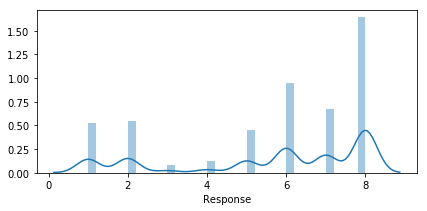

In [27]:
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
sns.distplot(df[target])
plt.show()

<font color=red size=5>__For Numerical Target Variable__</font>

plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
sns.distplot(df[target])
plt.subplot(1,2,2)
sns.distplot( df[ (df[target]<=500000) & (df[target]>36000) ][target] )
plt.show()

print ("# of outlier Records",len(df[  ~ ((df[target]<=500000) & (df[target]>=60000)) ]) )
#Removing Outliers
df = df[   ((df[target]<=500000) & (df[target]>=60000)) ]
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
sns.distplot(df[target])
plt.subplot(1,2,2)
sns.distplot(np.log2(df[target])*1000)
plt.show()

<font color=red size=3>__Feature Engineering on Numerical Target Variable__</fond>

#Scale Target Variable
df[target] = np.log2(df[target])*1000

<font color=red size=5> Categorical Variable Data Imbalance</fond>

df[cols_all_cat].head(2)

print (cols_all_cat)
sns.set_style("white")
plt.figure(figsize=(20,100))
i=1
while i<=len(cols_all_cat):
    plt.subplot(40,6,i)
    sns.barplot(y="Id", x=cols_all_cat[i-1], data=df, ci=0, estimator=len)
    i+=1
plt.tight_layout()

<font color=red size=5> Oridinal Variable Data Imbalance</font>

print (cols_all_ord)
sns.set_style("white")
plt.figure(figsize=(20,100))
i=1
while i<=len(cols_all_ord):
    plt.subplot(40,6,i)
    sns.barplot(y="Id", x=cols_all_ord[i-1], data=df, ci=0, estimator=len)
    i+=1
plt.tight_layout()

<font color=red size=5> Numerical Variable Data Distribution</font>

print (cols_all_num)
sns.set_style("white")
plt.figure(figsize=(20,100))
i=1
while i<=len(cols_all_num):
    plt.subplot(40,6,i)
    sns.boxplot( x=df[ cols_all_num[i-1] ])
    i+=1
plt.tight_layout()
plt.show()

<font color=red size=3> Feature Engigneering</font>

<font color=red size=3> Check Distribution Now</font>

print (cols_all_num)
sns.set_style("white")
plt.figure(figsize=(20,100))
i=1
while i<=len(cols_all_num):
    plt.subplot(40,6,i)
    sns.boxplot( x=df[ cols_all_num[i-1] ])
    i+=1
plt.tight_layout()
plt.show()

<font color=red size=6>Imputing Null Values</font>

<font color=red size=3>__Convert categorical variables into number__</font>

We need to convert values in categorical variables in number for following reasons.
1. So that we can check relation between categorical variable and sales price. 
- So that we can do Categorical Field's null value imputation using K Neighbour Mean. 
- So that we can do the modeling 

In [28]:
df1= df.copy()

In [29]:
global all_fldmap
all_fldmap = pd.DataFrame()
isNanFld=False

for fld in cols_all_cat:

    lst = list(df[fld].unique())
    try:
        if lst.index(np.nan):
            isNanFld=True
            lst.remove(np.nan)
            lst.insert(0,np.nan)
    except:
        continue
    finally:
        print ("Field Name:" , fld)
        print ("Original=>",lst)
        print ("Numeric=>",np.array(range(len(lst))), "\n")

        fmap = pd.DataFrame( list( zip([fld]*len(lst),lst, np.array(range(len(lst))) ) ) )
        fmap.columns = ['Fname','Original','Numeric']
        df[fld] = df[fld].apply(lambda x: lst.index(x))
        df[fld] = df[fld].astype(object)
        if isNanFld:
            df.loc[ df[fld]==0, fld] = np.nan
            isNanFld=False

        all_fldmap = pd.concat([all_fldmap,fmap])

Field Name: Product_Info_1
Original=> [1, 2]
Numeric=> [0 1] 

Field Name: Product_Info_2
Original=> ['D3', 'A1', 'E1', 'D4', 'D2', 'A8', 'A2', 'D1', 'A7', 'A6', 'A3', 'A5', 'C4', 'C1', 'B2', 'C3', 'C2', 'A4', 'B1']
Numeric=> [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18] 

Field Name: Product_Info_5
Original=> [2, 3]
Numeric=> [0 1] 

Field Name: Product_Info_6
Original=> [1, 3]
Numeric=> [0 1] 

Field Name: Product_Info_7
Original=> [1, 3, 2]
Numeric=> [0 1 2] 

Field Name: Employment_Info_3
Original=> [1, 3]
Numeric=> [0 1] 

Field Name: Employment_Info_5
Original=> [3, 2]
Numeric=> [0 1] 

Field Name: InsuredInfo_1
Original=> [1, 2, 3]
Numeric=> [0 1 2] 

Field Name: InsuredInfo_2
Original=> [2, 3]
Numeric=> [0 1] 

Field Name: InsuredInfo_3
Original=> [6, 8, 3, 4, 2, 1, 11, 7, 5, 10, 9]
Numeric=> [ 0  1  2  3  4  5  6  7  8  9 10] 

Field Name: InsuredInfo_4
Original=> [3, 2]
Numeric=> [0 1] 

Field Name: InsuredInfo_5
Original=> [1, 3]
Numeric=> [0 1] 

Field Name: In

<font color=red size=3>__Impute Numeric Value Fields__</font>

In [32]:
#Impute Numeric Null Values Columns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
my_imputer = IterativeImputer()
df_filled = my_imputer.fit_transform( df )
df_filled = pd.DataFrame(df_filled, columns=df.columns, index= df.index)

#in above steps categorical fields also got imputed. Because Iterative Imputer uses Linear Regression for imputation
#I don't want decimal number in imputed filed so reverting back those imputation.
df[cols_with_NullVal_num] = df_filled[cols_with_NullVal_num]

<font color=red size=3>__Impute Categorical Value Fields__</font>

In [31]:
#Impute Null Categorical Values
#Imputation will be done using non_null cols
def imputeNull_CatValues(df,fld):
 
    X_test = df[NonNullVal_cols]

    cols=NonNullVal_cols.copy()
    if fld not in cols:
        cols.append(fld)


    #training using none-null columns
    df_train = df [cols] [ df[fld].notna()] 

    #supplied fld in dataframe need to be classified. So we need to train using this field
    y_train= df_train[fld]
    X_train = df_train.drop(columns=fld)
    clusters = len(y_train.unique() )

    #KNeighborsClassifier is working better than above LogisticRegression
    from sklearn.neighbors import KNeighborsClassifier
    km = KNeighborsClassifier(n_neighbors=clusters)

    #t= X_train.isna().sum(axis=0)>=0
    #print ( X_train.loc[ ::,t ])
    #print (y_train.isna().sum())

    km.fit(X_train,y_train.astype(int))
    pred_train_clusterid = km.predict(X_train)
    pred_test_clusterid = km.predict(X_test)

    print (fld,"Accuracy on Train Dataset :",
    round(metrics.accuracy_score(y_train.astype(int), pred_train_clusterid),2))
    print ("==========================================")

    df1 = pd.DataFrame( {"prediction":pred_test_clusterid, "actual":df[fld]})

    #create a need field in temp dataframe df1, 
    #for a given field if actual==0 (it has null value) then use prediction to replace
    df1.loc[ df1["actual"].isna(),fld] = df1["prediction"]

    #If actual is not null then we should not use predicted cluster value, so use actual value
    df1.loc[ ~df1["actual"].isna(),fld] = df1["actual"]

    return (df1[fld])

In [33]:
## This steps impute null values only in Categorical Fields
temp =df.isna().sum()
NonNullVal_cols = list(temp[ temp==0].index)

for colname in cols_all_cat:
    if colname not in NonNullVal_cols:
        df[colname] = imputeNull_CatValues(df,colname)

In [34]:
#Check Null Values
(df.isnull().sum()/len(df)*100).sort_values()[::-1]

Response               0.0
Medical_History_8      0.0
Insurance_History_9    0.0
Family_Hist_1          0.0
Family_Hist_2          0.0
Family_Hist_3          0.0
Family_Hist_4          0.0
Family_Hist_5          0.0
Medical_History_1      0.0
Medical_History_2      0.0
Medical_History_3      0.0
Medical_History_4      0.0
Medical_History_5      0.0
Medical_History_6      0.0
Medical_History_7      0.0
Medical_History_9      0.0
Medical_History_26     0.0
Medical_History_11     0.0
Medical_History_12     0.0
Medical_History_13     0.0
Medical_History_14     0.0
Medical_History_15     0.0
Medical_History_16     0.0
Medical_History_17     0.0
Medical_History_18     0.0
Medical_History_19     0.0
Medical_History_20     0.0
Medical_History_21     0.0
Medical_History_22     0.0
Medical_History_23     0.0
                      ... 
Medical_Keyword_17     0.0
Medical_Keyword_16     0.0
Medical_History_29     0.0
Medical_History_30     0.0
Medical_History_31     0.0
Medical_History_33     0.0
M

<font color=red size=4>For Regression Problem, Visualising Relationship between y & X</font>

<font color=red size=5>Check y & Cateorical Variable Relationship</font>

print (cols_all_cat)
sns.set_style("white")
plt.figure(figsize=(20,100))
i=1
while i<=len(cols_all_cat):
    plt.subplot(40,6,i)
    sns.scatterplot(y=df[target], x=cols_all_cat[i-1], data=df)
    i+=1
plt.tight_layout()

<font color=red size=5>Check y & Ordinal Variable Relationship</font>

print (cols_all_ord)
sns.set_style("white")
plt.figure(figsize=(20,100))
i=1
while i<=len(cols_all_ord):
    plt.subplot(40,6,i)
    sns.scatterplot(y=df[target], x=cols_all_ord[i-1], data=df)
    i+=1
plt.tight_layout()

<font color=red size=5> Check y & Numeric Variable Relationship</font>

print (cols_all_num)
sns.set_style("white")
plt.figure(figsize=(20,100))
i=1
while i<=len(cols_all_num):
    plt.subplot(40,6,i)
    sns.scatterplot(y=df[target], x=cols_all_num[i-1], data=df)
    i+=1
plt.tight_layout()

#All fields looks have liner relationship. So no transformation is required for any field.

<font color=red size=5> Check Degree of Correlation between y & Numeric Variable</font>

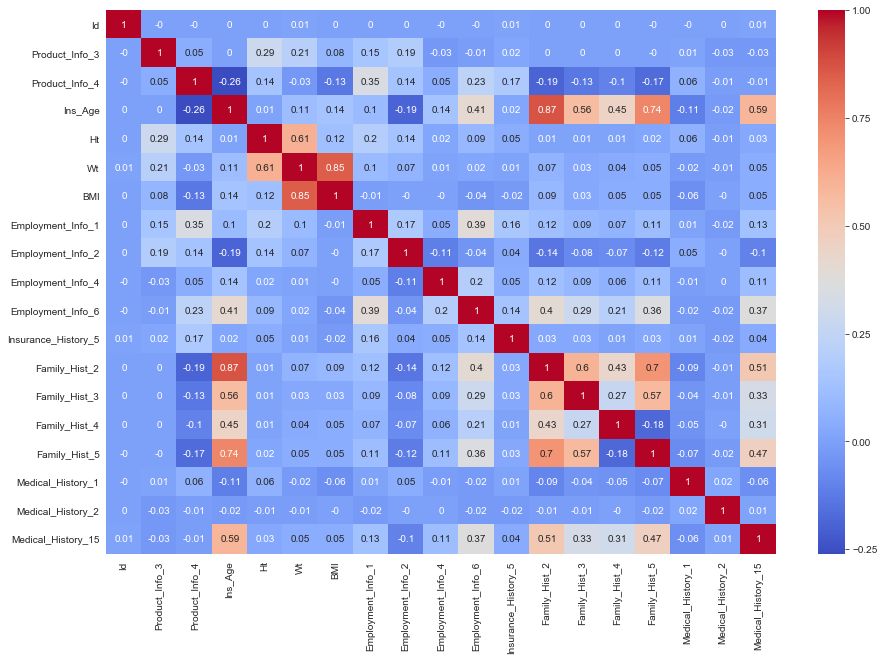

In [35]:
df_corr = np.round(df[cols_all_num].corr(),2)
sns.set_style("white")
plt.figure(figsize=(15,10))
sns.heatmap(df_corr, annot=True, cmap="coolwarm")
plt.show()

<font color=red size=5> Create Dummy Fields</font>

In [36]:
df.shape

(59381, 125)

In [37]:
#Create dummy fields for all cateorical variables
dummies = pd.get_dummies( df[cols_all_cat] )
df.drop(columns=cols_all_cat, inplace=True)
df = pd.concat([df,dummies], axis=1)

print (dummies.shape, df.shape)

(59381, 276) (59381, 296)


<font color=red size=5> Find & Remove Outliers</font>

<font color=red size=3> Identify Outliers</font>

In [38]:
outlier_cols95 = df[cols_all_num].quantile(.95, axis = 0)
outlier_cols995 = df[cols_all_num].quantile(.995, axis = 0)

outlier_det = pd.DataFrame( {"Per95":outlier_cols95, "Per995": outlier_cols995})
outlier_det['Dif'] =100*(outlier_det.Per995-outlier_cols95)/outlier_cols995
outlier_det.sort_values("Dif", ascending=False)

,Per95,Per995,Dif
Employment_Info_4,0.032400,0.150000,78.400000
Medical_History_1,25.000000,82.000000,69.512195
Employment_Info_1,0.200000,0.500000,59.999999
Insurance_History_5,0.004000,0.010000,59.999997
Employment_Info_2,14.000000,32.000000,56.250000
Family_Hist_4,0.984367,1.911745,48.509526
BMI,0.699805,0.909579,23.062772
Wt,0.451883,0.581590,22.302157
Product_Info_3,26.000000,31.000000,16.129032
Ins_Age,0.716418,0.820895,12.727270


In [39]:
#Only those columns which has more than 19% difference between 95 and 99.5 percentile has outlier values
outlier_cols = outlier_det.iloc[ list(outlier_det.Dif>45),: ].index
print (outlier_cols)

Index(['Employment_Info_1', 'Employment_Info_2', 'Employment_Info_4',
       'Insurance_History_5', 'Family_Hist_4', 'Medical_History_1'],
      dtype='object')


<font color=red size=3> Visualize Outliers Distribution</font>

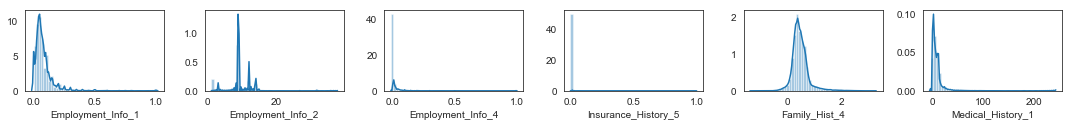

In [40]:
#Visualize the outlier fields
plt.figure(figsize=(15,100))
i=1
for col  in outlier_cols:
    plt.subplot(60, 6,i)
    sns.distplot(df[col])
    i+=1
    
plt.tight_layout()

<font color=red size=3> Remove Outliers</font>

In [41]:
#outlier_cols = ['BsmtFinSF1','GrLivArea','EnclosedPorch','MasVnrArea','LotFrontage','TotalBsmtSF']
outlier_cols_dict = dict( df[outlier_cols].quantile(.995, axis = 0))

for k,v in outlier_cols_dict.items():
    df =  df[ df[k]<=v]

<font color=red size=3> Visualize Again : Distribution of Old Outlier Fields</font>

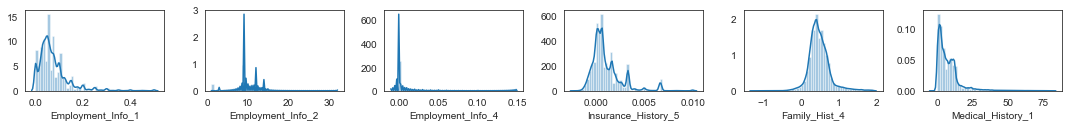

In [42]:
#Visualize the outlier fields
plt.figure(figsize=(15,100))
i=1
for col  in outlier_cols:
    plt.subplot(60, 6,i)
    sns.distplot(df[col])
    i+=1
    
plt.tight_layout()

<font color=blue size=4>__Store Cleaned Data and Dummy Parameter Mapped in separate File__</font>

In [43]:
df.to_csv("clean_train_data_prudential.csv")
all_fldmap.to_csv("all_fldmap_prudential.csv")

<font color=red size=5>__Split Dataset & Scale Numeric Fields__</font>

In [ ]:
#Split Dataset in X & y
Xcols = list(df.columns)
Xcols.remove(target)

X = df[Xcols]
y = df[target]

In [ ]:
# split X, y into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)
X_train_id = X_train.Id
X_test_id = X_test.Id

X_train = X_train.drop(columns="Id")
X_test = X_test.drop(columns="Id")

In [ ]:
print(y_train.mean())
print(y_test.mean())

In [ ]:
# scaling the numeric feature features in train and test
from sklearn.preprocessing import StandardScaler

cols_scale = cols_all_num.copy()

cols_scale.remove("Id")

try:
    cols_scale.remove(target)
except Exception as e:
    print (e)
sc = StandardScaler()
X_train[cols_scale] =pd.DataFrame( sc.fit_transform( X_train[cols_scale] ), index=X_train.index )
X_test[cols_scale]  =pd.DataFrame( sc.transform( X_test[cols_scale] ) , index=X_test.index)

### PCA Compression

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver="randomized",random_state=100)
pca_scaled = pca.fit_transform(X,y)
pca_scaled = pd.DataFrame(pca_scaled)
pca_scaled.head()

In [ ]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
#Only 1 PCA feature can explain 99.99% of variance

In [ ]:
pca_scaled = pca_scaled[[0]]
pca_scaled.columns = ["PCA1"]

### PCA Feature Engineering

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(2,2,1)
sns.scatterplot(pca_scaled.PCA1, y)

plt.show()

In [ ]:
#After Removing Outlier

<font color=red size=5>__Start Modeling__</font>